In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv("Downloads\\Lineardata_train.csv")
# print(data)
# print(data.columns)
data = data.to_numpy()    #converting the dataset to numpy

<h3>STEPS</h3>
1)Understanding the given dataset.
<br>
2)scaling the features.
<br>
3) Defining some necesarry functions.
<br>
4)Finding parameters using Gradient Descent algorithm.
<br>
5)Calculating accuracy of the model developed for training dataset.
<br>
6)Testing the model on test dataset.

<h3>Understanding the given dataset</h3>

In [3]:
np.random.shuffle(data)
X = data[:, range(1,21)]   #features
Y = data[: , 0]            #targets


In [4]:
X_train = X[:40000,:]
Y_train = Y[:40000]
X_val = X[40000:,:]
Y_val = Y[40000:]

In [5]:
print(X_train[:2, :])
X_train.shape

[[ 2.03389889e+00 -2.17399992e-01  7.15664972e+00  2.74062538e+00
  -4.64676868e+00 -1.15614720e+00  2.42701721e-01  2.64487498e+01
   1.94972705e+01 -4.45450404e+00  1.25203112e+01  9.39104070e+00
   3.65858355e+01 -1.96873092e+01 -7.85150393e+01 -1.45716836e+02
   5.75075908e-01  5.26260178e+00  7.11552916e+01  4.99663180e+01]
 [ 5.44019371e-01  2.74334222e+00  7.54329146e+00  1.19703111e-01
   3.26171348e+00  6.48187804e+00 -3.49620129e+00 -4.11200477e+01
  -4.29061335e+00 -5.55457466e-01 -2.24723820e+01  6.61694269e+00
   3.32987236e+01 -8.58137789e+00 -4.38324304e+01 -4.08137830e+02
  -1.36161977e+01 -3.66398223e+00 -2.98979197e+00 -3.37310596e+01]]


(40000, 20)

In [6]:
X_val.shape

(10000, 20)

In [7]:
print(Y_train[:2])
Y_train.shape

[  3774.38445906 -18823.70675088]


(40000,)

In [8]:
print(X_train[0].max())
print(X_train[0].min())    

71.15529158620325
-145.71683550324812


<h3>Feature Scaling</h3>
<h4>Z-score Normalization</h5>

In [9]:
'''function to calculate mean of each feature'''
def mean(X):
    return np.mean(X , axis = 0)         #returns array containing mean of each feature

In [10]:
'''function to calculate standard deviation of each feature'''
def std_dev(X):
    return np.std(X, axis =0)      #returns array containing standard deviation of each feature

In [11]:
'''function to scale input features using Z-score normalization technique'''
def Z_norm(X , X_val= None):
    if X_val is not None:
        m,n = X_val.shape
        mu = mean(X)
        std = std_dev(X)
        X_norm = (X_val- mu)/std               # X_norm =(m,n)
        return X_norm 
    m,n = X.shape
    mu = mean(X)
    std = std_dev(X)
    X_norm = (X- mu)/std               # X_norm =(m,n)
    return X_norm                      #returns array of scaled features         

In [12]:
X_train_final = Z_norm(X_train)    #final X that is to be used for further computations
X_val_final = Z_norm(X_train ,X_val)

<h3>Defining some necessary function</h3>

In [13]:
'''function to compute cost-function'''
def compute_cost(X ,Y, w , b):
    m,n = X.shape
    f_wb = np.dot(X,w)+b
    cost = np.sum((f_wb - Y)**2)
    cost = (1/(2*m))*cost
    return cost
    

In [14]:
def compute_gradient(X,Y,w,b):
    m,n = X.shape
    dj_dw= np.zeros(n)
    f_wb = np.dot(X,w)+b
    dj_db = np.mean((f_wb- Y))
    dj_dw  =  (f_wb - Y)@X
    dj_dw = (dj_dw)/m
    return dj_dw,dj_db

In [15]:
'''function to perform Gradient Descent algorithm'''
def Gradient_descent(X, Y , num_iters,alpha):
    m,n = X.shape
    w= np.zeros(X.shape[1])
    b= 0
    cost_history = []
    for i in range(num_iters):
        dj_dw,dj_db = compute_gradient(X,Y,w,b)
        w = w - (alpha*dj_dw)
        b = b - (alpha*dj_db)
        cost_history.append(compute_cost(X,Y,w,b))
        if ( i% math.ceil(num_iters/50) == 0):
            print(f"Iterations : {i:5} , cost : {cost_history[-1]}")
        
    return w, b, cost_history
    


<h3>Finding parameters using Gradient Descent Algorithm</h3>
<h5>Initialized weights and biases with zeroes of respective size</h5>

In [35]:
alpha = 0.1
num_iters = 1000
w,b,cost_history = Gradient_descent(X_train_final , Y_train , num_iters , alpha)


Iterations :     0 , cost : 53205967.98410864
Iterations :    20 , cost : 777103.6234347868
Iterations :    40 , cost : 11443.674986225664
Iterations :    60 , cost : 169.90007561853164
Iterations :    80 , cost : 2.547587313715227
Iterations :   100 , cost : 0.04339944725349965
Iterations :   120 , cost : 0.00563360273396473
Iterations :   140 , cost : 0.005059697498828305
Iterations :   160 , cost : 0.005050911541768765
Iterations :   180 , cost : 0.005050776074048196
Iterations :   200 , cost : 0.005050773970929332
Iterations :   220 , cost : 0.005050773938062701
Iterations :   240 , cost : 0.005050773937546767
Iterations :   260 , cost : 0.0050507739375382655
Iterations :   280 , cost : 0.005050773937537326
Iterations :   300 , cost : 0.005050773937538193
Iterations :   320 , cost : 0.005050773937537943
Iterations :   340 , cost : 0.005050773937537393
Iterations :   360 , cost : 0.005050773937537669
Iterations :   380 , cost : 0.005050773937537865
Iterations :   400 , cost : 0.0050

In [36]:
print(b)

116.94824469946752


In [37]:
print(w)

[2.20576110e+01 3.31057633e+01 9.93794419e+00 6.06122286e+00
 1.75332699e+02 3.29785518e+02 2.54777426e+02 9.02204657e+02
 4.36528042e+02 8.38105710e+01 1.21493255e+02 1.60322552e+03
 1.67787312e+03 1.31344586e+03 6.00335803e+02 1.05636677e+04
 5.05538953e+02 6.79329109e+02 3.15803936e+03 2.30437838e+02]


<h3>COST VS NUMBER  OF ITERATIONS PLOT</h3>

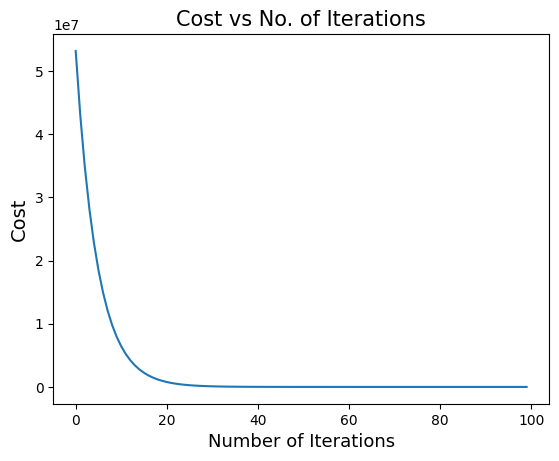

In [38]:
plt.plot(np.arange(len(cost_history))[:100], cost_history[:100])
plt.xlabel('Number of Iterations', size=13)
plt.ylabel('Cost', size=14)
plt.title('Cost vs No. of Iterations', size = 15)
plt.show()

<h3>Performance Over Validation Set</h3>
<h5>Plot Representing Regression line for Feature-1</h5>

In [39]:
def prediction(x,w,b):
    return (np.dot(x,w)+b)

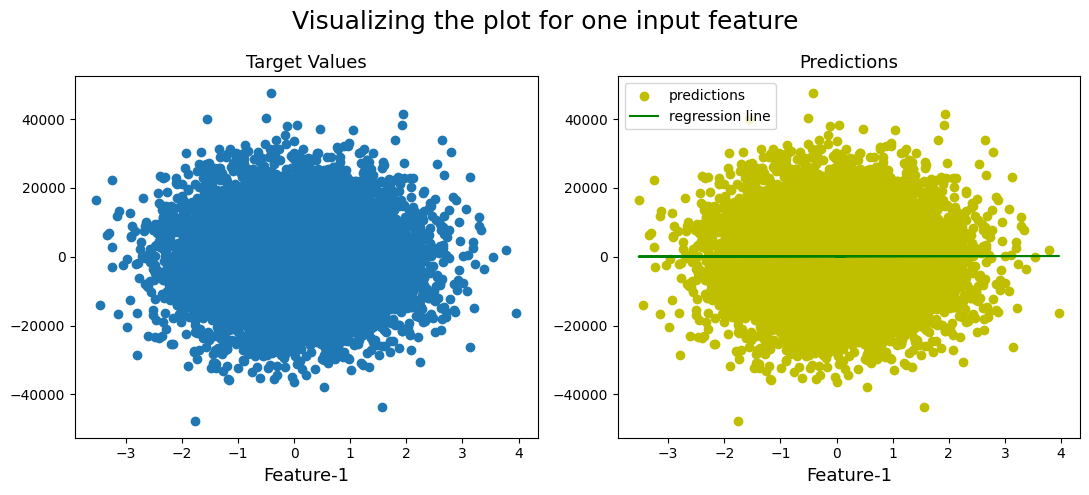

In [40]:
fig , ax = plt.subplots( 1, 2 ,sharey = False, figsize=(11,5))
ax[0].scatter(X_val_final[:,0] , Y_val , label='Target')
ax[1].scatter(X_val_final[:,0] , prediction(X_val_final ,w,b) , label = 'predictions' , c='y')
ax[1].plot(X_val_final[:,0] , (X_val_final[:,0]*w[0] + b), label ='regression line', c='g')
ax[0].set_title('Target Values', size=13)
ax[1].set_title('Predictions' , size = 13)
ax[0].set_xlabel('Feature-1',size=13)
ax[1].set_xlabel('Feature-1',size=13)
plt.suptitle('Visualizing the plot for one input feature', size=18)
plt.tight_layout()
plt.legend()
plt.show()

<h3>Accuracy - Validation Set</h3>
<h4>MSE, R2 SCORE</h4>

In [41]:
for i in range(X_val.shape[0]):
    print(f"prediction : {prediction(X_val_final[i],w ,b)} , target value : {Y_val[i]}")

prediction : -11939.507131260072 , target value : -11939.430122298236
prediction : 10026.663204145128 , target value : 10026.567649147471
prediction : 12167.63001155628 , target value : 12167.516101894147
prediction : 14638.349766234627 , target value : 14638.337190336675
prediction : 3439.015539512128 , target value : 3438.8317197777515
prediction : -2442.791784576994 , target value : -2442.7600428939168
prediction : 966.6907858158606 , target value : 966.6908789245558
prediction : -24770.148008411 , target value : -24770.1510104072
prediction : 13598.747369105733 , target value : 13598.82421121396
prediction : 14692.304345396014 , target value : 14692.34577224349
prediction : -4597.649826791865 , target value : -4597.660294621956
prediction : -13616.31217136927 , target value : -13616.3953299128
prediction : 21904.119297460566 , target value : 21904.254996699707
prediction : -17975.589140986296 , target value : -17975.677733913817
prediction : 13594.99060519693 , target value : 13595

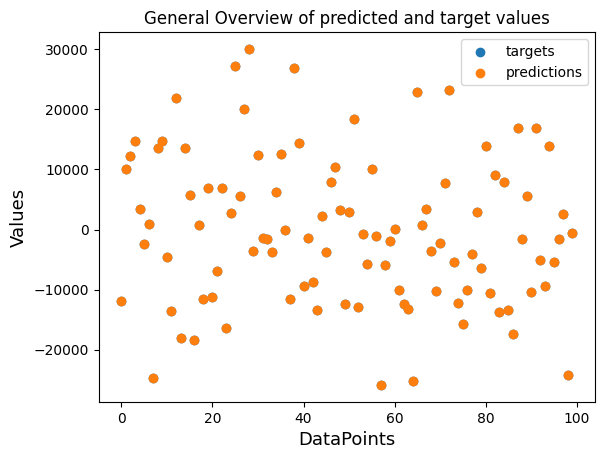

In [42]:
plt.scatter(range(100), Y_val[:100], label='targets')
plt.scatter(range(100), prediction(X_val_final,w,b)[:100], label='predictions')
plt.title('General Overview of predicted and target values')
plt.xlabel('DataPoints', size=13)
plt.ylabel('Values', size=13)
plt.legend()
plt.show()

In [43]:
SSR = np.sum((Y_val - prediction(X_val_final, w, b))**2)
SST =np.sum((Y_val - np.mean(Y_val))**2)
R2_SCORE = 1-(SSR/SST)
print(R2_SCORE)

0.9999999999218246


In [44]:
mse_train = compute_cost(X_train_final , Y_train , w , b)
print(mse_train)

0.005050773937537865


In [45]:
mse_val = compute_cost(X_val_final , Y_val , w ,b)
print(mse_val)

0.005054569222780917


In [46]:
SSR = np.sum((Y_train - prediction(X_train_final, w, b))**2)
SST =np.sum((Y_train - np.mean(Y_train))**2)
R2_SCORE = 1-(SSR/SST)
print(R2_SCORE)

0.9999999999231622


The R2 Score for the model over Validation set is 0.9999999999218246
<br>
The MSE( cost function) for the model over training is0.0050507739375378654
<br>
The R2 Score for the model over Training dataset is0.99999999992316224
<br>
The MSE for model over validation set is0.0050545692227809174


<h3>Testing the model on the Test dataset</h3>

In [47]:
test_data = pd.read_csv("Downloads\\Lineardata_test.csv")
# print(test_data.columns)
test_data = test_data.to_numpy()

In [48]:
X_test = np.delete(test_data , 0 , axis =1)
ID = test_data[:,0]

In [49]:
X_test.shape

(10000, 20)

In [50]:
X_test_final = Z_norm(X_train,X_test)

In [51]:
for i in range(X_test.shape[0]):
    print(f" IDs : {ID[i]} , prediction : {prediction(X_test_final[i],w ,b)}")

 IDs : 14189.0 , prediction : -5420.002051780175
 IDs : 14742.0 , prediction : 17534.73983413101
 IDs : 13905.0 , prediction : 4663.853544396361
 IDs : 10072.0 , prediction : 2675.4458865277297
 IDs : 14879.0 , prediction : 3383.701047858199
 IDs : 13815.0 , prediction : 25792.10713715028
 IDs : 19697.0 , prediction : 24862.321422536836
 IDs : 17494.0 , prediction : 2612.523466889954
 IDs : 16252.0 , prediction : -9793.038161657472
 IDs : 16260.0 , prediction : 12398.928924584778
 IDs : 10947.0 , prediction : 16657.904418144743
 IDs : 11538.0 , prediction : -7509.205113542477
 IDs : 10851.0 , prediction : -18323.471149171026
 IDs : 12313.0 , prediction : -7973.945006074353
 IDs : 14644.0 , prediction : -7547.604310675448
 IDs : 17497.0 , prediction : 684.3223901375961
 IDs : 12965.0 , prediction : -10146.13019156014
 IDs : 17746.0 , prediction : 4748.582557254476
 IDs : 13264.0 , prediction : 14162.919128198786
 IDs : 15763.0 , prediction : -23796.376633162872
 IDs : 13170.0 , predicti

In [52]:
Y_test = prediction(X_test_final,w ,b)
Predictions = np.c_[(ID,Y_test)]
df = pd.DataFrame(Predictions , columns=['IDs' , 'Predicted Values'])
df.to_csv("Downloads\\CL-Project\\linear_Reg_Predictions.csv" , index=False)